# Project Title : Uber Rides Data Analysis using Python

## Purpose 

The aim of this project is to delve into this trove of data and harness the power of Python programming for comprehensive analysis. By leveraging Python's versatile data analysis libraries such as Pandas, NumPy, and Matplotlib, we seek to uncover actionable insights that can inform strategic decision-making and enhance the operational efficiency of Uber's services.

## Step 1 : Importing necessary packages

In [149]:
#Importing necessary packages for data manupulating and visualization
import pandas as pd #pandas to load the data frame in a 2D array format
import numpy as np  #numpy to perform large computations
import matplotlib.pyplot as plt #this is to draw visualizations
import seaborn as sns #to draw visualizations

## Step 2 : Loading the data from the local system to the jupyter notebook


In [150]:
 #Load the files
dataset = pd.read_csv(r'C:\Users\Amrutha Bandi\Downloads\UberDataset.csv')

# Print the dataset
print(dataset)

            START_DATE          END_DATE  CATEGORY             START  \
0     01-01-2016 21:11  01-01-2016 21:17  Business       Fort Pierce   
1     01-02-2016 01:25  01-02-2016 01:37  Business       Fort Pierce   
2     01-02-2016 20:25  01-02-2016 20:38  Business       Fort Pierce   
3     01-05-2016 17:31  01-05-2016 17:45  Business       Fort Pierce   
4     01-06-2016 14:42  01-06-2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                  STOP    MILES          PURPOSE  
0          Fort Pierce      5.1   Meal/Entertain  
1          Fort Pierce      5.0  

## Step 3 : Data View

In [151]:
#Display the first 5 rows of the dataset
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [152]:
# Display the last 5 rows of the dataset
dataset.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [153]:
# Prints the list of column names of the dataset
dataset.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [154]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [155]:
dataset.shape

(1156, 7)

In [156]:
dataset.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [157]:
dataset.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


## Step 4 : Data Preprocessing

As I understood that there are a lot of null values in PURPOSE column, so for that I will be filling the null values with a NOT keyword.

In [158]:
dataset.fillna({'PURPOSE': "NOT"}, inplace=True)

Changing the START_DATE and END_DATE to the date_time format so that further it can be use to do analysis.

In [159]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], 
									errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], 
									errors='coerce')


Splitting the START_DATE to date and time column and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night

In [160]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
							bins = [0,10,15,19,24],
							labels = ['Morning','Afternoon','Evening','Night'])

Once we are done with creating new columns, we can now drop rows with null values

In [161]:
dataset.dropna(inplace=True)

It is also important to drop the duplicates rows from the dataset. To do that, refer the code below.

In [162]:
dataset.drop_duplicates(inplace=True)

## Step 5 : Data Visualization

In [115]:
# Checking the unique values in dataset of the columns with object datatype.
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
    unique_values[col] = dataset[col].unique().size
    unique_values

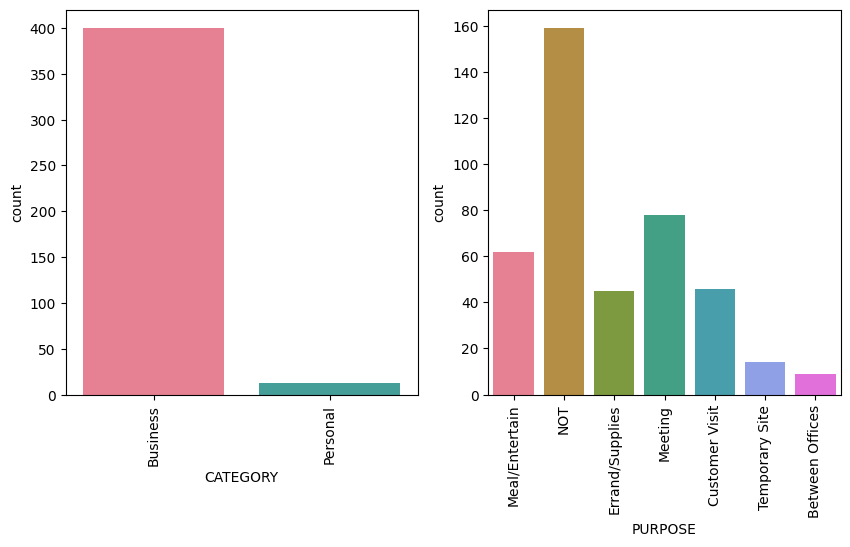

In [109]:
#using matplotlib and seaborn library for countplot the CATEGORY and PURPOSE columns.
plt.figure(figsize=(10, 5))


palette1 = sns.color_palette("husl", len(dataset['CATEGORY'].unique()))  
palette2 = sns.color_palette("husl", len(dataset['PURPOSE'].unique()))  

# First subplot
plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x='CATEGORY', hue='CATEGORY', palette=palette1, legend=False)
plt.xticks(rotation=90)

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(data=dataset, x='PURPOSE', hue='PURPOSE', palette=palette2, legend=False)
plt.xticks(rotation=90)

plt.show()


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160')])

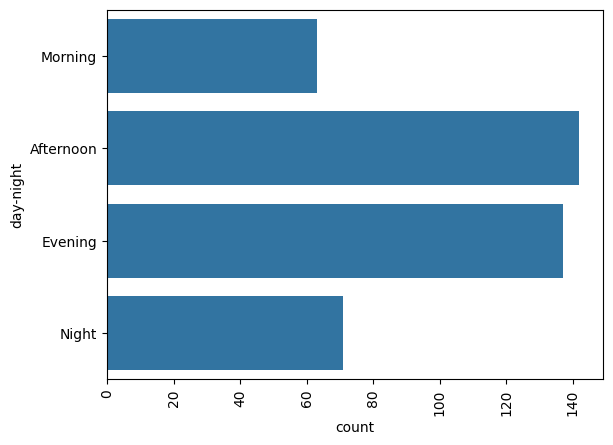

In [117]:
sns.countplot(dataset['day-night'])
plt.xticks(rotation=90)

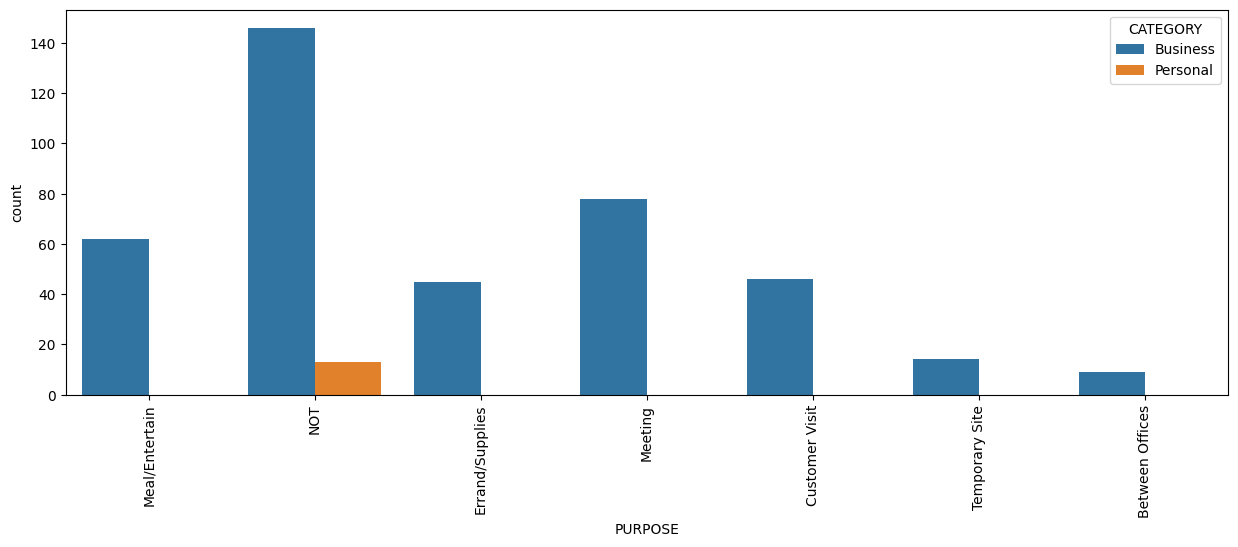

In [122]:
# Comparing the two different categories along with the PURPOSE of the user.
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

### Insights from the above count-plots : 
- Most of the rides are booked for business purpose.
- Most of the people book cabs for Meetings and Meal / Entertain purpose.
- Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).

In [132]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder without setting sparse parameter
OH_encoder = OneHotEncoder()

# Fit and transform the data
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]).toarray())

# Set index for OH_cols to match dataset index
OH_cols.index = dataset.index


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

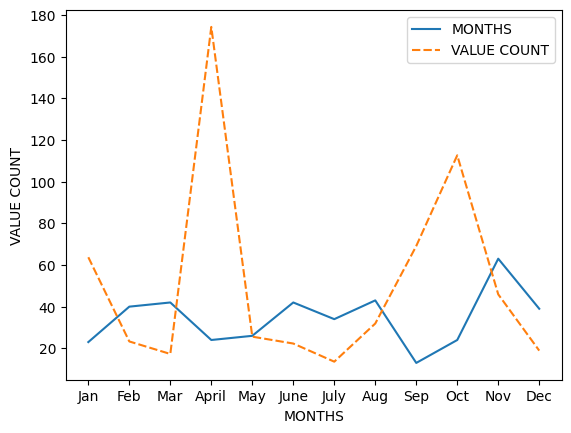

In [135]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
			5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
			9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
				"VALUE COUNT": dataset.groupby('MONTH',
												sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")


Insights from the above plot : 
- The counts are very irregular.
- Still its very clear that the counts are very less during Nov, Dec, Jan, which justifies the fact that  time winters are there in Florida, US.

### Visualization for days data

In [137]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
	0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)


Text(0, 0.5, 'COUNT')

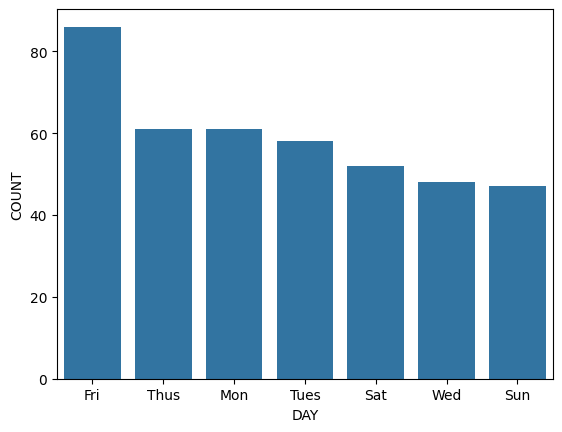

In [138]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')


<Axes: ylabel='MILES'>

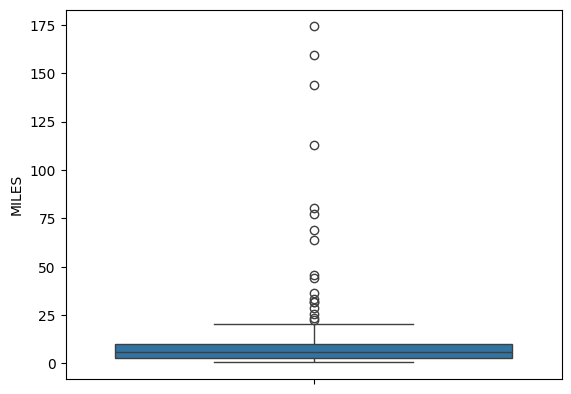

In [139]:
sns.boxplot(dataset['MILES'])

<Axes: ylabel='MILES'>

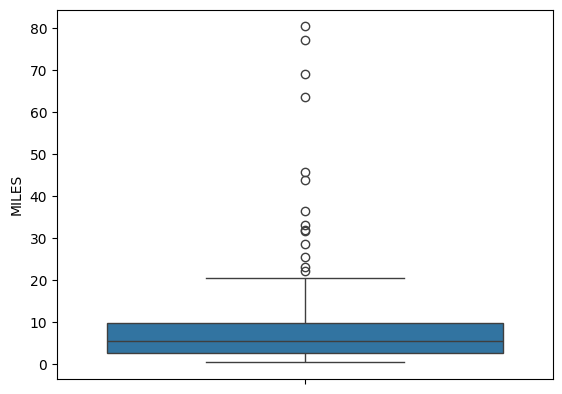

In [140]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES']) #zoom in it for values lees than 100.


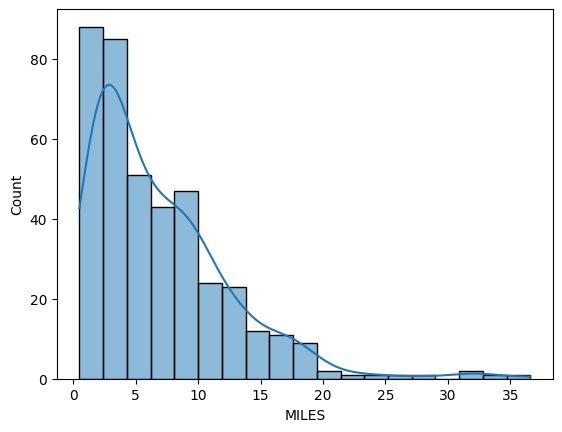

In [142]:
# Use histplot instead of distplot
sns.histplot(dataset[dataset['MILES'] < 40]['MILES'], kde=True)

# Show the plot
plt.show()


### Insights from the above plots :
- Most of the cabs booked for the distance of 4-5 miles.
- Majorly people chooses cabs for the distance of 0-20 miles.
- For distance more than 20 miles cab counts is nearly negligible.

## Conclusion:

From these observations, it appears that the demand for cab services is highest for short to moderate distances, while there is limited demand for longer distances.
Therefore, to optimize service provision and resource allocation, cab companies may focus their efforts on catering to the needs of customers within the 0-20 mile range,
ensuring efficient and timely service for these commonly requested trip lengths. Additionally, understanding the preferences and behaviors of customers for different 
trip lengths can inform marketing strategies and service offerings tailored to meet their specific needs.





